
# **AQLI Screening Test**





### **1. Basic wrangling tasks and questions**

**Description:** In this analysis, we will first count the number of GADM2 regions in India. Then, we will calculate the population-weighted average pollution at the country level for all years and identify the top 10 most polluted countries in 2021. We will also determine the most polluted GADM2 regions globally for the years 1998, 2005, and 2021. Finally, we will create a trendline plot for the population-weighted pollution in Uttar Pradesh from 1998 to 2021 and save the plot as a high-quality PNG file.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
import matplotlib.patheffects as pe
import matplotlib.colors as mcolors

In [ ]:
# First, let's define teh file path
file_path = "/Users/peghini/Desktop/AQLI_Screening-test/gadm2_aqli_1998_2021.csv"

# Read the CSV file
df = pd.read_csv(file_path)

In [16]:
df.shape

(48155, 80)

In [17]:
# this will handle missing values
df.fillna(method='ffill', inplace=True)

# This will remove duplicate rows if any
df.drop_duplicates(inplace=True)

# This will standardize column names (lowercase and replacing spaces with underscores)
df.columns = df.columns.str.lower().str.replace(' ', '_')

<ipython-input-17-03a1b354f7cb>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)




### **1.1 How many GADM2 regions are present in India?**

In [18]:
df_in = df[df['country'] == 'India']
df_in.head()

,objectid_gadm2,iso_alpha3,country,name_1,name_2,population,whostandard,natstandard,pm1998,pm1999,...,llpp_nat_2012,llpp_nat_2013,llpp_nat_2014,llpp_nat_2015,llpp_nat_2016,llpp_nat_2017,llpp_nat_2018,llpp_nat_2019,llpp_nat_2020,llpp_nat_2021
17295,17298,IND,India,Andaman and Nicobar,Nicobar Islands,35672.0,5,40.0,7.65,8.07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17296,17299,IND,India,Andaman and Nicobar,North and Middle Andaman,103796.0,5,40.0,16.54,16.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17297,17300,IND,India,Andaman and Nicobar,South Andaman,231783.0,5,40.0,13.05,12.98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17298,17301,IND,India,Andhra Pradesh,Anantapur,4337847.0,5,40.0,18.43,18.98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17299,17302,IND,India,Andhra Pradesh,Chittoor,4430270.0,5,40.0,14.56,15.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
num_gamd2 = df_in['name_2'].nunique()
print(f"Number of GADM2 regions in India: {num_gamd2}")

Number of GADM2 regions in India: 684


### **1.2. Calculate population weighted pollution average of all years at country (GADM0) level**


* **Save the country level file as a CSV.**

* **What are the 10 most polluted countries in 2021?**

In [20]:
pm_columns = [col for col in df.columns if col.startswith("pm")]

In [22]:
df["weighted_pop"] = df["population"]

# Group by country and then calculate the weighted pollution for each year
df_country = df.groupby("country").apply(
    lambda x: (x[pm_columns].multiply(x["population"], axis=0)).sum() / x["population"].sum()
)
df_country.reset_index(inplace=True)

<ipython-input-22-50af648bc15b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_country = df.groupby("country").apply(


In [23]:
df_country.to_csv("country_level_pollution.csv", index=False)

In [55]:
df_2021 = df_country[["country", "pm2021"]]  # Keep only 2021 data
top_10_polluted = df_2021.sort_values(by="pm2021", ascending=False).head(10)  # Sort and get top 10

print(top_10_polluted)

                              country     pm2021
17                         Bangladesh  73.957984
100                             India  58.701530
151                             Nepal  51.713215
165                          Pakistan  44.732405
142                          Mongolia  36.039302
147                           Myanmar  34.979832
59   Democratic Republic of the Congo  34.648322
179             Republic of the Congo  32.409004
182                            Rwanda  32.356333
36                            Burundi  31.912485


In [54]:
top_10_polluted.head()

,country,pm2021
17,Bangladesh,73.957984
100,India,58.701530
151,Nepal,51.713215
165,Pakistan,44.732405
142,Mongolia,36.039302


### **1.3. What was the most polluted GADM2 region in the world in 1998, 2005 and 2021?**



**Method I**

In [25]:
most_polluted_1998 = df.loc[df['pm1998'].idxmax()]
most_polluted_2005 = df.loc[df['pm2005'].idxmax()]
most_polluted_2021 = df.loc[df['pm2021'].idxmax()]

region_1998 = most_polluted_1998['name_2'], most_polluted_1998['pm1998']
region_2005 = most_polluted_2005['name_2'], most_polluted_2005['pm2005']
region_2021 = most_polluted_2021['name_2'], most_polluted_2021['pm2021']

# Print the results
print(f"Most polluted region in 1998: {region_1998[0]} with PM2.5: {region_1998[1]}")
print(f"Most polluted region in 2005: {region_2005[0]} with PM2.5: {region_2005[1]}")
print(f"Most polluted region in 2021: {region_2021[0]} with PM2.5: {region_2021[1]}")

Most polluted region in 1998: Unnao with PM2.5: 78.55
Most polluted region in 2005: NCT of Delhi with PM2.5: 98.75
Most polluted region in 2021: NCT of Delhi with PM2.5: 126.51


**Method II**

In [26]:
years = [1998, 2005, 2021]

In [27]:
for year in years:
    pm_column = f"pm{year}"

    most_polluted_row = df.loc[df[pm_column].idxmax()]

    print(f"Most polluted region in {year}:")
    print(f"Country: {most_polluted_row['country']}")
    print(f"Region: {most_polluted_row['name_2']}")
    print(f"PM2.5 Level: {most_polluted_row[pm_column]}\n")

Most polluted region in 1998:
Country: India
Region: Unnao
PM2.5 Level: 78.55

Most polluted region in 2005:
Country: India
Region: NCT of Delhi
PM2.5 Level: 98.75

Most polluted region in 2021:
Country: India
Region: NCT of Delhi
PM2.5 Level: 126.51



### **1.4. Plot a population weighted pollution average trendline plot for Uttar Pradesh from 1998 to 2021. Save this plot as a high quality PNG file.**

In [28]:
df_UP = df[df["name_1"] == "Uttar Pradesh"]

In [29]:
pm_columns = [col for col in df.columns if col.startswith("pm")]

In [30]:
years = [int(col[2:]) for col in pm_columns]

In [31]:
# Calculate population-weighted pollution for UP
pop_weighted_pm = (df_UP[pm_columns].multiply(df_UP["population"], axis=0)).sum() / df_UP["population"].sum()

# Convert to numpy array for visualization
pm_values = pop_weighted_pm.values

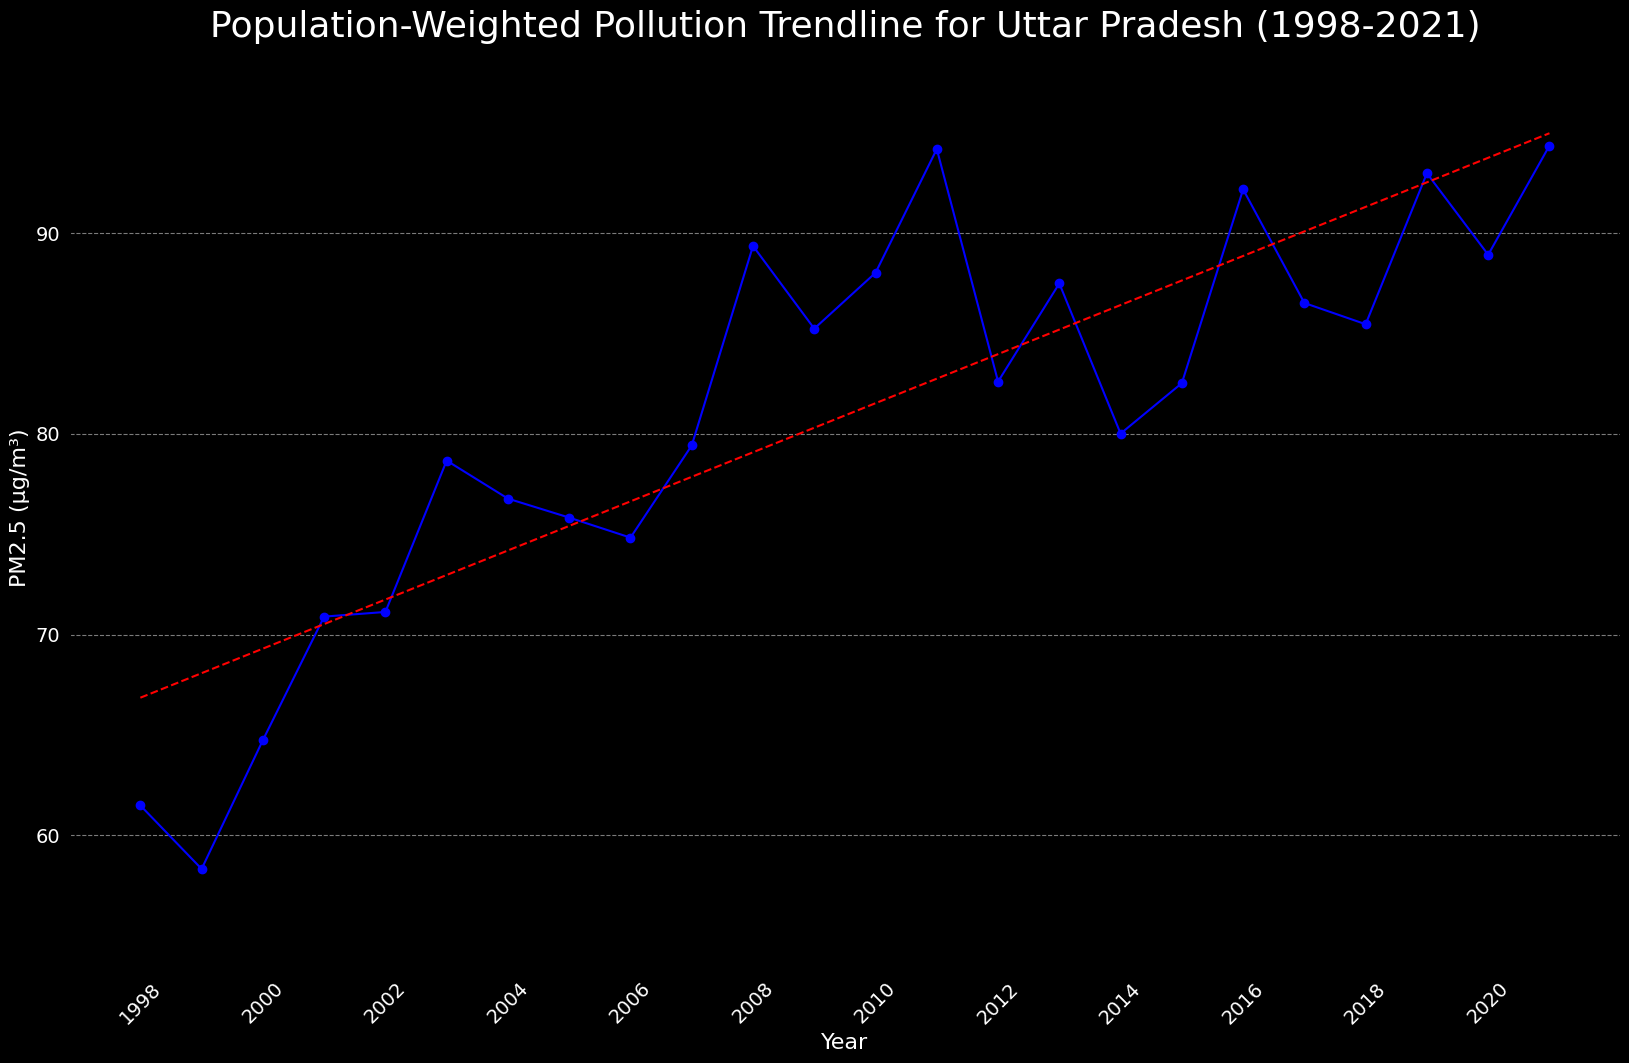

In [32]:
# The figure size is set to 20x12 inches, and the background color is set to black.
plt.figure(figsize=(20, 12), facecolor="black")
plt.plot(years, pm_values, marker="o", linestyle="-", color="b", label="PM2.5 Levels")

# This will add a linear trendline using numpy's polyfit
coeffs = np.polyfit(years, pm_values, 1)
trendline = np.polyval(coeffs, years)
plt.plot(years, trendline, linestyle="--", color="r", label="Trendline")  # Add trendline

# Setting plot title and axis labels
# This section sets the title and labels for the x and y axes of the plot.
plt.title("Population-Weighted Pollution Trendline for Uttar Pradesh (1998-2021)",fontsize=26,color="white",)
plt.xlabel("Year", fontsize=16, color="white")
plt.ylabel("PM2.5 (µg/m³)", fontsize=16, color="white")

# Setting tick marks and grid
# This section sets the appearance of tick marks on the x and y axes and adds a grid for better visualization.
plt.xticks(range(1998, 2022, 2), rotation=45, fontsize=14, color="white")
plt.yticks(fontsize=14, color="white")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Setting plot background color
# This line sets the background color of the plot to black.
plt.gca().set_facecolor("black")
plt.ylim(min(pm_values) - 5, max(pm_values) + 5)


# This line will save the plot as a high-quality PNG file
plt.savefig("uttar_pradesh_pollution_trendline.png", dpi=300, bbox_inches="tight")

# Display the plot
# This line displays the plot with all the configured settings and data.
plt.show()


# **2. Geospatial tasks and questions**

**2.1 Plot a bar graph for the life years lost relative to the WHO guideline in the 10 most polluted countries in the world and also plot them on a global country level map. For the map, the 10 most polluted country boundaries should be filled in with “dark red” and the rest of the map should be grayed out. Save both the bar graph and the map as high quality PNG files**



In [33]:
#This line will download the world map dataset
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

In [34]:
top_10_polluted = df.groupby("country")[["pm2021", "llpp_who_2021", "population"]].mean().reset_index()

In [35]:
top_10_polluted = top_10_polluted.sort_values(by="pm2021", ascending=False).head(10)
top_10_polluted.head(10)

,country,pm2021,llpp_who_2021,population
17,Bangladesh,71.800781,6.546875,2.575075e+06
100,India,51.091826,4.517014,1.939508e+06
151,Nepal,42.204416,3.646234,3.955509e+05
165,Pakistan,34.554938,2.896313,1.487749e+06
147,Myanmar,34.553250,2.896125,6.987153e+05
59,Democratic Republic of the Congo,33.867000,2.828750,4.377401e+05
39,Cameroon,33.579828,2.801034,4.925644e+05
179,Republic of the Congo,32.617917,2.706667,1.137312e+05
182,Rwanda,32.372000,2.682333,4.311449e+05
36,Burundi,32.155038,2.661504,9.204719e+04


In [36]:
top_10_polluted["total_life_years_lost"] = top_10_polluted["llpp_who_2021"] * top_10_polluted["population"]

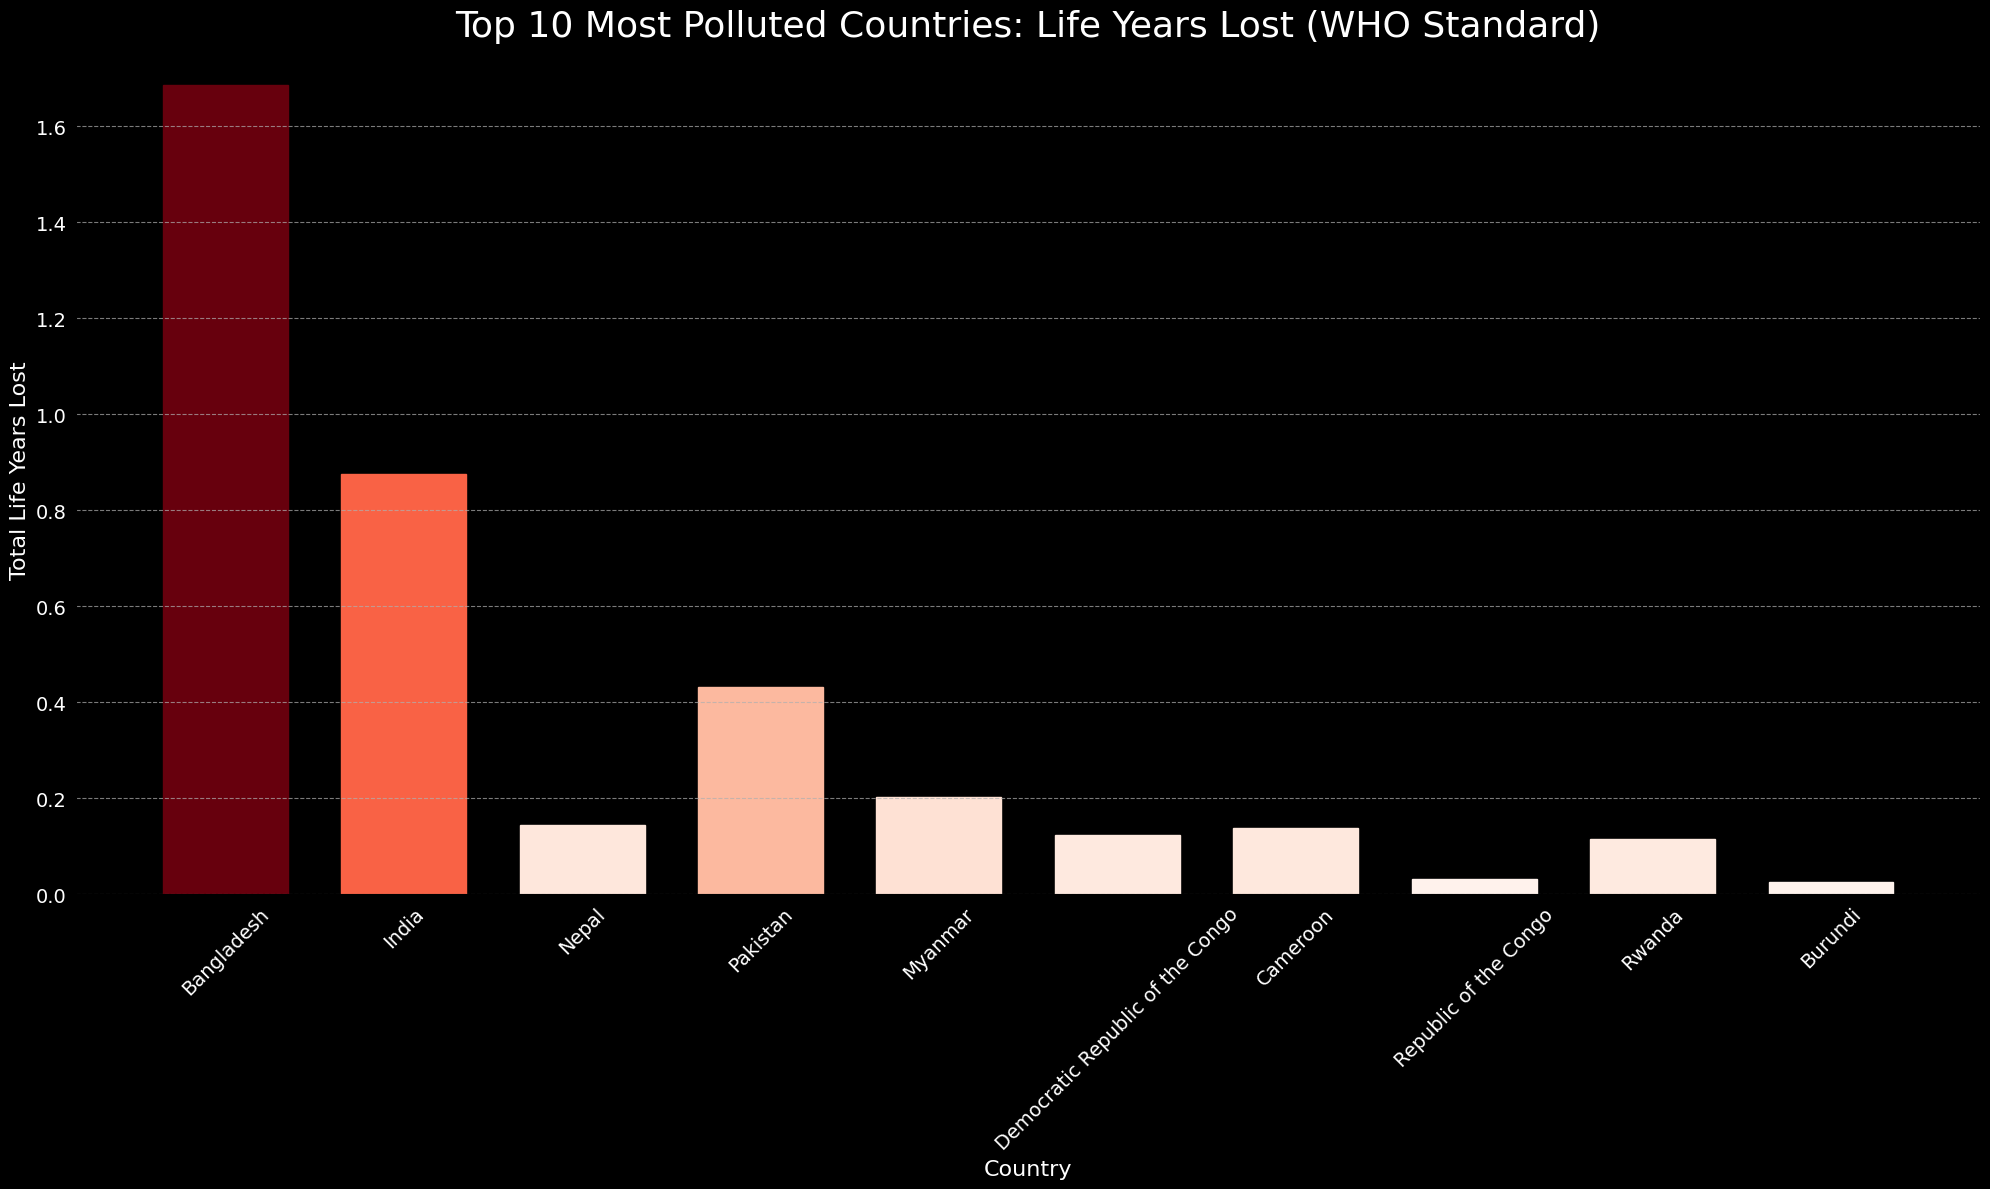

In [37]:
# Plot bar graph

# Define the color map for the gradient (Red Shades)
color_map = plt.cm.Reds  # Using 'Reds' to represent severity of life years lost

plt.figure(figsize=(20, 12), facecolor="black")

# This will create thin bars with gradient color mapping
bars = plt.bar(top_10_polluted["country"], top_10_polluted["total_life_years_lost"], edgecolor="gray", width=0.7)

# This will et color for each bar based on the corresponding value in total life years lost
for bar, value in zip(bars, top_10_polluted["total_life_years_lost"]):
    color = color_map(value / max(top_10_polluted["total_life_years_lost"]))
    bar.set_color(color)

# Set plot title and axis labels and Sett tick marks and grid
plt.title("Top 10 Most Polluted Countries: Life Years Lost (WHO Standard)", fontsize=26, color="white")
plt.xlabel("Country", fontsize=16, color="white")
plt.ylabel("Total Life Years Lost", fontsize=16, color="white")

plt.xticks(rotation=45, fontsize=14, color="white")
plt.yticks(fontsize=14, color="white")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Set plot background color
plt.gca().set_facecolor("black")

plt.tight_layout()
plt.savefig("top_10_life_years_lost.png", dpi=300, bbox_inches="tight")

plt.show()

In [38]:
# Plot world map such a way that mostly polluted area will be red and other will be gray colored
# Use the correct country name column
world["color"] = world["ADMIN"].apply(lambda x: "darkred" if x in top_10_polluted["country"].values else "lightgray")

# This will create colormap for color bar
pollution_colors = ["lightgray", "darkred"]  # Gray = Low pollution, Dark Red = High pollution
cmap = mcolors.LinearSegmentedColormap.from_list("pollution", pollution_colors)

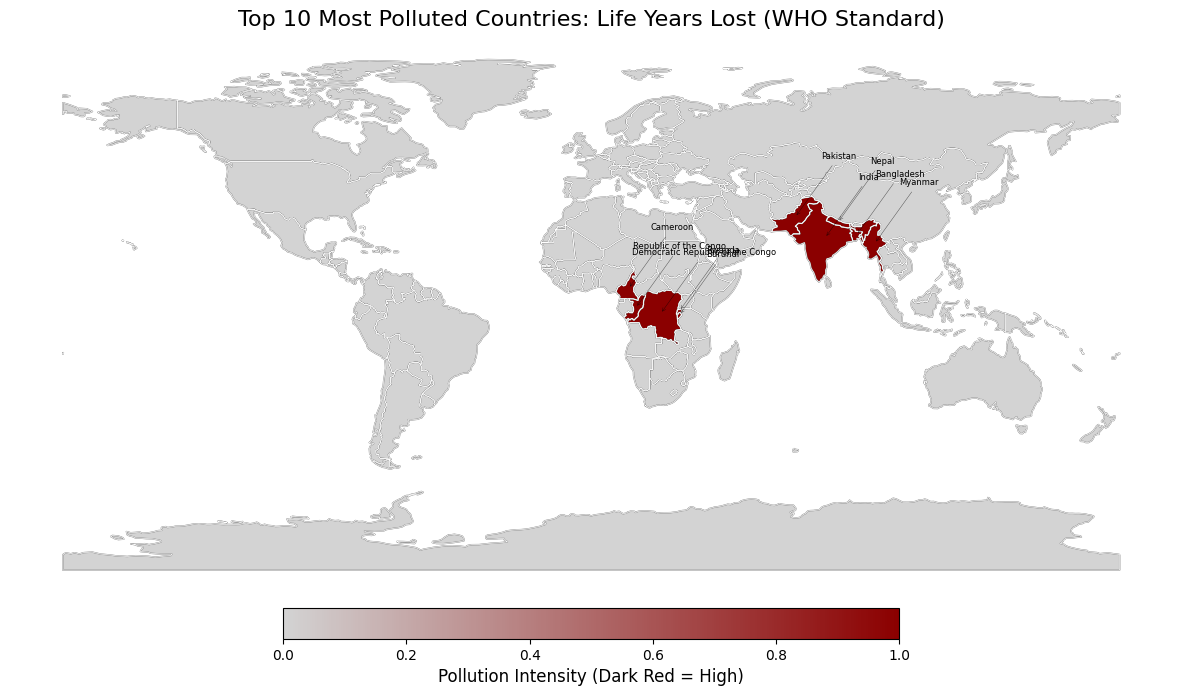

In [40]:
# Create plot
fig, ax = plt.subplots(figsize=(15, 8))
world.boundary.plot(ax=ax, linewidth=0.5, color="white")
world.plot(ax=ax, color=world["color"], edgecolor="gray")

# This will help to annotate the top 10 polluted countries
for idx, row in world.iterrows():
    if row["ADMIN"] in top_10_polluted["country"].values:
        centroid = row.geometry.centroid  # Get country centroid
        ax.annotate(
            row["ADMIN"],
            xy=(centroid.x, centroid.y),
            xytext=(centroid.x + 15, centroid.y + 20),
            arrowprops=dict(arrowstyle="->", color="black", linewidth=0.3, linestyle="-", alpha=0.7),
            fontsize=6, color="black", weight="normal",
            ha="center"
        )

# This will add the color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mcolors.Normalize(vmin=0, vmax=1))
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.05, pad=0.02)
cbar.set_label("Pollution Intensity (Dark Red = High)", fontsize=12)

# Title and layout
plt.title("Top 10 Most Polluted Countries: Life Years Lost (WHO Standard)", fontsize=16, color="black")
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# Save and show
plt.savefig("top10_life_years_lost_countries_map.png", dpi=300, bbox_inches="tight")
plt.show()

### **2.2 Create a potential gain in life expectancy (relative to the WHO guideline) map of eastern v/s western europe at GADM level 2 and save it as a high quality PDF.**

* Plot should be in AQLI “Potential gain in life expectancy” color scale. Visit [AQLI website Index page](https://aqli.epic.uchicago.edu/the-index/) See legend for “Potential gain in life expectancy” and infer “exact” colors from that.

* You can define east and west europe based on any acceptable definition online, but whatever definition you use - mention the source.

* Feel free to add annotations/text boxes etc. to help explain the visualization.

Based upon following website i defined the regions of east and west europe:

* https://www.nationsonline.org/oneworld/europe.htm#Eastern-Europe

* https://unstats.un.org/unsd/methodology/m49/

In [60]:
# Check unique values in a few columns
for col in world.columns:
    print(f"Column: {col}")
    print(world[col].unique(), "\n")

Column: featurecla
['Admin-0 country'] 

Column: scalerank
[1 3] 

Column: LABELRANK
[6 3 7 2 5 4] 

Column: SOVEREIGNT
['Fiji' 'United Republic of Tanzania' 'Western Sahara' 'Canada'
 'United States of America' 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea'
 'Indonesia' 'Argentina' 'Chile' 'Democratic Republic of the Congo'
 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti' 'Dominican Republic' 'Russia'
 'The Bahamas' 'United Kingdom' 'Norway' 'Denmark' 'France' 'East Timor'
 'South Africa' 'Lesotho' 'Mexico' 'Uruguay' 'Brazil' 'Bolivia' 'Peru'
 'Colombia' 'Panama' 'Costa Rica' 'Nicaragua' 'Honduras' 'El Salvador'
 'Guatemala' 'Belize' 'Venezuela' 'Guyana' 'Suriname' 'Ecuador' 'Jamaica'
 'Cuba' 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali' 'Mauritania'
 'Benin' 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana' 'Ivory Coast'
 'Guinea' 'Guinea-Bissau' 'Liberia' 'Sierra Leone' 'Burkina Faso'
 'Central African Republic' 'Republic of the Congo' 'Gabon'
 'Equatorial Guinea' 'Zambia' 'Malawi' 'Mozambique'

<Axes: >

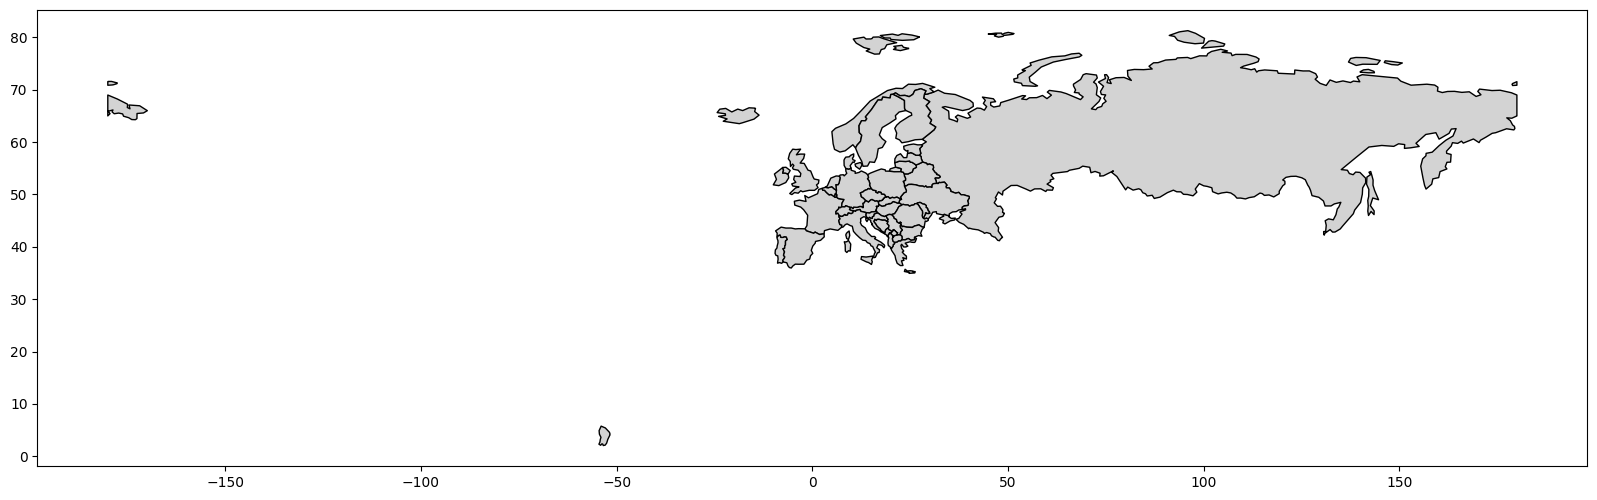

In [71]:
europe = world[world['CONTINENT'] == 'Europe']

# Plot the map
europe.plot(figsize=(20, 20), edgecolor="black", color="lightgrey")

In [73]:
gadm_level2 = gpd.read_file("/content/aqli_gadm2_final_june302023.shp")

In [63]:
europe = world[world['CONTINENT'] == 'Europe']

In [74]:
eastern_europe = {"Poland", "Czech Republic", "Hungary", "Romania", "Ukraine", "Russia", "Bulgaria"}
western_europe = {"Germany", "France", "Netherlands", "Belgium", "Austria", "Switzerland", "Luxembourg"}

In [76]:
df_europe = df[df["country"].isin(eastern_europe | western_europe)]

In [91]:
# This will define AQLI Color Scale similar as in AQLI Website
color_scale = {
    0.1: "#FFFFFF",
    0.5: "#F7E6C2",
    1.0: "#FCD19C",
    2.0: "#FBA55C",
    3.0: "#E8713C",
    4.0: "#D34B27",
    5.0: "#B40F0D",
    6.0: "#7F0014",
    10.0: "#54278F"
}

# Convert dictionary to a color map
cmap = mcolors.LinearSegmentedColormap.from_list("AQLI", list(color_scale.values()))
norm = mcolors.Normalize(vmin=0, vmax=10)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

# Apply color mapping
europe_map["color"] = europe_map["llpp_who_2021"].apply(lambda x: color_scale[min(int(x), 6)])

# This will plot Eastern Europe and western europe
europe_map[europe_map["country"].isin(eastern_europe)].plot(ax=ax, color=europe_map["color"], edgecolor="black", label="Eastern Europe")
europe_map[europe_map["country"].isin(western_europe)].plot(ax=ax, color=europe_map["color"], edgecolor="black", label="Western Europe")

# This will add Title & Labels
plt.title("Potential Gain in Life Expectancy - Eastern vs. Western Europe", fontsize=14)
plt.legend(["Eastern Europe", "Western Europe"])
plt.axis("off")

# save the figure as pdf
plt.savefig("Europe_Life_Expectancy_Map.pdf", format="pdf", dpi=300)
plt.show()

### **2.3 Look at the [AQLI website](https://aqli.epic.uchicago.edu/the-index/)  switch to Air pollution tab plot a static version of the global pollution map you see there, in those “exact” same colors. Export it as a high quality (320 dpi) SVG file.**

In [63]:
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")

In [64]:
world = world.merge(df, left_on="ADMIN", right_on="country", how="left")

In [65]:
# Define the AQLI color scale
aqli_colors = [
    (0, "#E8F7FB"),
    (5, "#CBE9F3"),
    (10, "#AADAE8"),
    (20, "#79BDD8"),
    (30, "#4BA2C8"),
    (40, "#2D9C95"),
    (50, "#1D7B75"),
    (60, "#153F66"),
    (70, "#362A5F")
]

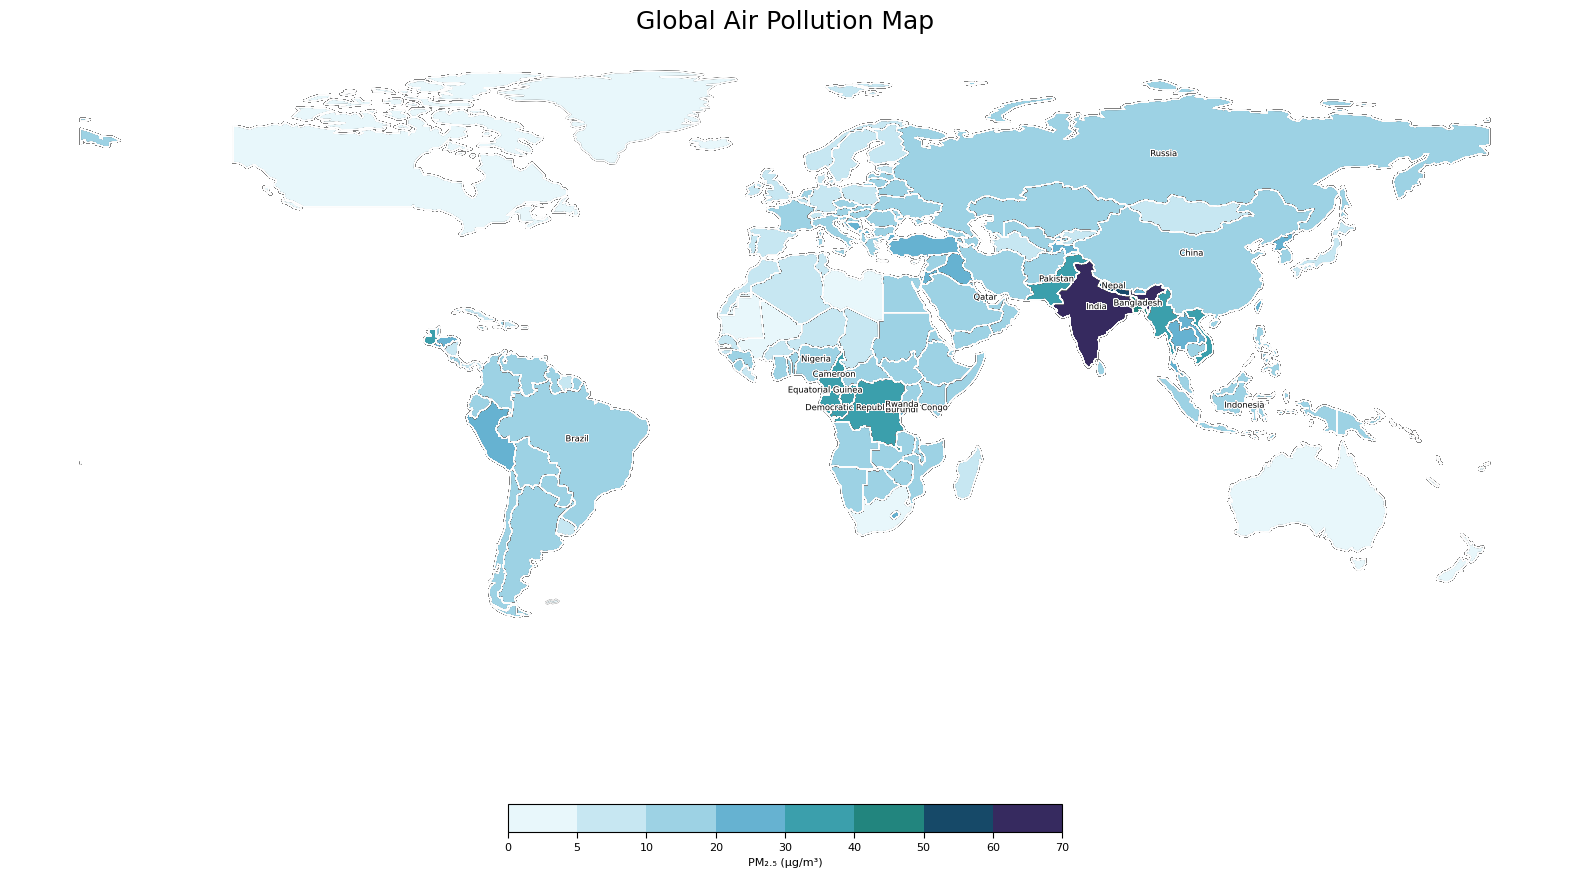

In [71]:
aqli_cmap = mcolors.LinearSegmentedColormap.from_list("aqli", [color[1] for color in aqli_colors])
norm = mcolors.BoundaryNorm([c[0] for c in aqli_colors], aqli_cmap.N)

# Create the plot
fig, ax = plt.subplots(figsize=(20, 12))
world.boundary.plot(ax=ax, linewidth=0.5, color="white")  # Country borders
world.plot(ax=ax, column="pm2021", cmap=aqli_cmap, norm=norm, edgecolor="gray")  # Apply new color scale

key_countries = ["Bangladesh", "India", "Nepal", "Qatar", "Pakistan",
                 "Democratic Republic of the Congo", "Burundi", "Rwanda",
                 "Equatorial Guinea", "Cameroon", "China", "United States",
                 "Indonesia", "Nigeria", "Brazil", "Russia", "México"]

# Annotate only these countries on the map
for idx, row in world.iterrows():
    if row["ADMIN"] in key_countries:
        ax.annotate(
            row["ADMIN"],
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            fontsize=6, color="black", weight="light",
            path_effects=[pe.withStroke(linewidth=1, foreground="white")],
            ha="center"
        )

# This will add color bar to represent pollution levels
sm = plt.cm.ScalarMappable(cmap=aqli_cmap, norm=norm)
cbar = plt.colorbar(sm, ax=ax, orientation="horizontal", fraction=0.03, pad=0.02)
cbar.set_label("PM₂.₅ (µg/m³)", fontsize=6, fontweight="normal")

# Customize color bar labels and design
cbar.set_label("PM₂.₅ (µg/m³)", fontsize=8, fontweight="normal")
cbar.set_ticks([0, 5, 10, 20, 30, 40, 50, 60, 70])
cbar.ax.tick_params(labelsize=8, width=0.8, length=4)  # Make ticks smaller and less obtrusive

# This will remove axis labels and ticks for a clean map
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)

# This will adjust map with light borders and light gray background
world.boundary.plot(ax=ax, linewidth=0.3, color="white")
ax.set_facecolor("#f5f5f5")

# Add title and save as SVG
plt.title("Global Air Pollution Map", fontsize=18)
plt.savefig("global_air_pollution_map.svg", format="svg", dpi=320)

# Show the plot
plt.show()
